In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

d:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("FMF4.csv")
 
# # # Replace NaN with 0
df.fillna(0, inplace=True)
subset =  df.iloc[0:1984,0:50]

In [3]:
X = subset[['Eff area02b', 'Eff area02a', 'Eff area21d', 'Eff area21c', 'Eff area21b', 'Eff area21a', 'Eff area11d', 'Eff area11c', 'Eff area11b', 'Eff area11a', 'Eff area01b', 'Eff area01a', 'dneffaa1', 'dneffab1', 'dneffac1', 'dneffad1', 'dneffba1', 'dneffbb1', 'dneffbc1', 'dneffbd1', 'dneffaa2', 'dneffbb2', 'dneffcc2', 'dneffdd2', 'dneffaa3', 'dneffba3', 'dneffca3', 'dneffda3', 'dneffab3', 'dneffbb3', 'dneffcb3', 'dneffdb3']].astype(np.float64)
y = subset[['V number', 'R core', 'R cladding', 'n core', 'n cladding', 'NA', 'LP02effb', 'LP02effa', 'LP21effd', 'LP21effc', 'LP21effb', 'LP21effa', 'LP11effd', 'LP11effc', 'LP11effb', 'LP11effa', 'LP01effb', 'LP01effa']].astype(np.float64)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1010)


In [4]:
from sklearn.multioutput import MultiOutputRegressor


model = GradientBoostingRegressor()
multi_target_gbr = MultiOutputRegressor(model)
multi_target_gbr.fit(X_train, y_train)
y_pred = multi_target_gbr.predict(X_test)

In [5]:
mse= mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.0006061841677309198
R-squared (R2 Score): 0.84879632173637
Mean Absolute Error (MAE): 0.004624036765612993


In [112]:
input_dict = {   'Eff area01': ['Eff area01a', 'Eff area01b'],
    'Eff area11': ['Eff area11a', 'Eff area11b', 'Eff area11c', 'Eff area11d'],
    'Eff area21': ['Eff area21a', 'Eff area21b', 'Eff area21c', 'Eff area21d'],
    'Eff area02': ['Eff area02a', 'Eff area02b'],
    'dneff1': ['dneffaa1', 'dneffab1', 'dneffac1', 'dneffad1', 'dneffba1', 'dneffbb1', 'dneffbc1', 'dneffbd1'],
    'dneff2': ['dneffaa2', 'dneffbb2', 'dneffcc2', 'dneffdd2'],
    'dneff3': ['dneffaa3', 'dneffba3', 'dneffca3', 'dneffda3', 'dneffab3', 'dneffbb3', 'dneffcb3', 'dneffdb3']
}
def predict_output(user_input_dneff1,user_input_dneff2,user_input_dneff3,user_input_effarea_01,user_input_effarea_11,user_input_effarea_21,user_input_effarea_02):
    # Predict the output based on user input
    input = user_input_dneff1+user_input_dneff2+user_input_dneff3+user_input_effarea_01+user_input_effarea_11+user_input_effarea_21+user_input_effarea_02
    predicted_output = multi_target_gbr.predict([input])
    return predicted_output

# Example: Prompt the user for input and predict the output
user_input_dneff1 = [float(input("Enter the value of feature 'dneff1': "))]*len(input_dict['dneff1'])
user_input_dneff2 = [float(input("Enter the value of feature 'dneff2': "))]*len(input_dict['dneff2'])
user_input_dneff3 = [float(input("Enter the value of feature 'dneff3': "))]*len(input_dict['dneff3'])
user_input_effarea_01= [float(input("Enter the value of feature 'Eff area01': "))]*len(input_dict['Eff area01'])
user_input_effarea_11=[float(input("Enter the value of feature 'Eff area11': "))]*len(input_dict['Eff area11'])
user_input_effarea_21=[float(input("Enter the value of feature 'Eff area21': "))]*len(input_dict['Eff area21'])
user_input_effarea_02=[float(input("Enter the value of feature 'Eff area02': "))]*len(input_dict['Eff area02'])
predicted_output = predict_output( user_input_dneff1,user_input_dneff2,user_input_dneff3,user_input_effarea_01,user_input_effarea_11,user_input_effarea_21,user_input_effarea_02)
output = {}
for i in range(len(y.columns)):
    output[f'{y.columns[i]}'] =  predicted_output[0][i]
    print(f'{y.columns[i]} : {predicted_output[0][i]}')

V number : 4.678564967624926
R core : 9.255253008524623e-06
R cladding : 6.250000000000001e-05
n core : 1.4496828810869784
n cladding : 1.4439999999999997
NA : 0.12839045773063262
LP02effb : 1.4448161705701148
LP02effa : 1.4447863913964072
LP21effd : 1.4452745334837718
LP21effc : 1.4453122087762038
LP21effb : 1.4453122721811709
LP21effa : 1.445270786697979
LP11effd : 1.4469893246573144
LP11effc : 1.4470126398037055
LP11effb : 1.4469824060000689
LP11effa : 1.4470159269025908
LP01effb : 1.4487566917866082
LP01effa : 1.4488068844286297


d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Gradi

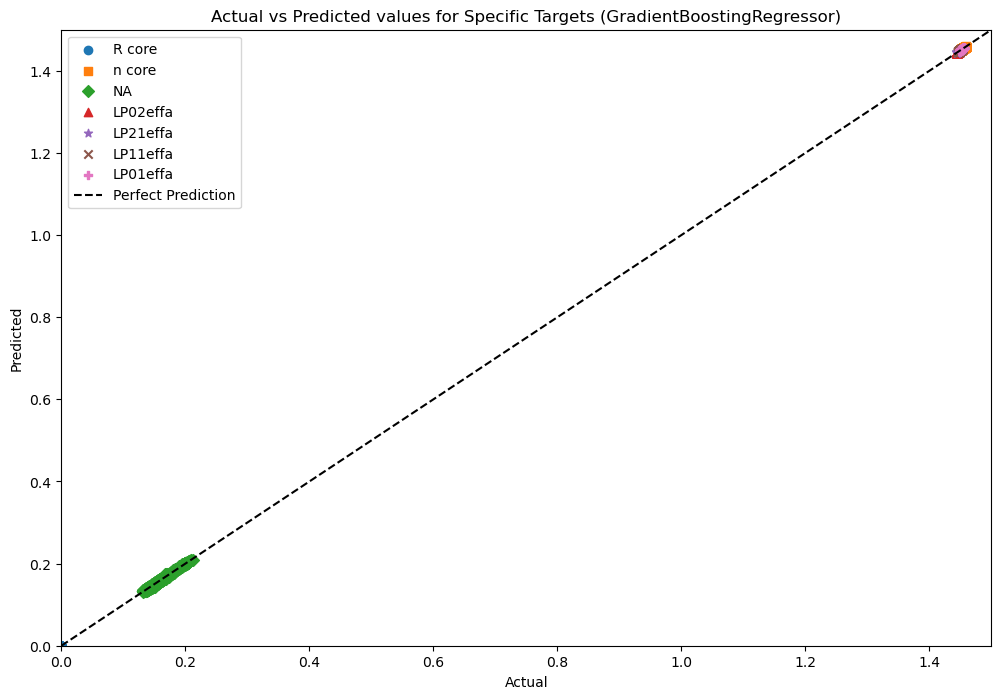

In [114]:
# Define the specific targets
specific_targets = ['R core', 'n core', 'NA', 'LP02effa', 'LP21effa', 'LP11effa', 'LP01effa']

# Define marker styles for each target
markers = ['o', 's', 'D', '^', '*', 'x', 'P']

# Plot the actual vs predicted values for specific targets
plt.figure(figsize=(12, 8))

for target, marker in zip(specific_targets, markers):
    idx = y_test.columns.get_loc(target)
    plt.scatter(y_test.iloc[:, idx], y_pred[:, idx], label=target, marker=marker)

# Plot the perfect prediction line
plt.plot([min(y_test.values.min(), y_pred.min()), max(y_test.values.max(), y_pred.max())],
         [min(y_test.values.min(), y_pred.min()), max(y_test.values.max(), y_pred.max())], '--k', label='Perfect Prediction')


# Set limits for x-axis and y-axis
plt.xlim(0, 1.5)  # Adjust these values according to your desired range
plt.ylim(0, 1.5)  # Adjust these values according to your desired range

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values for Specific Targets (GradientBoostingRegressor)')
plt.legend()
plt.show()

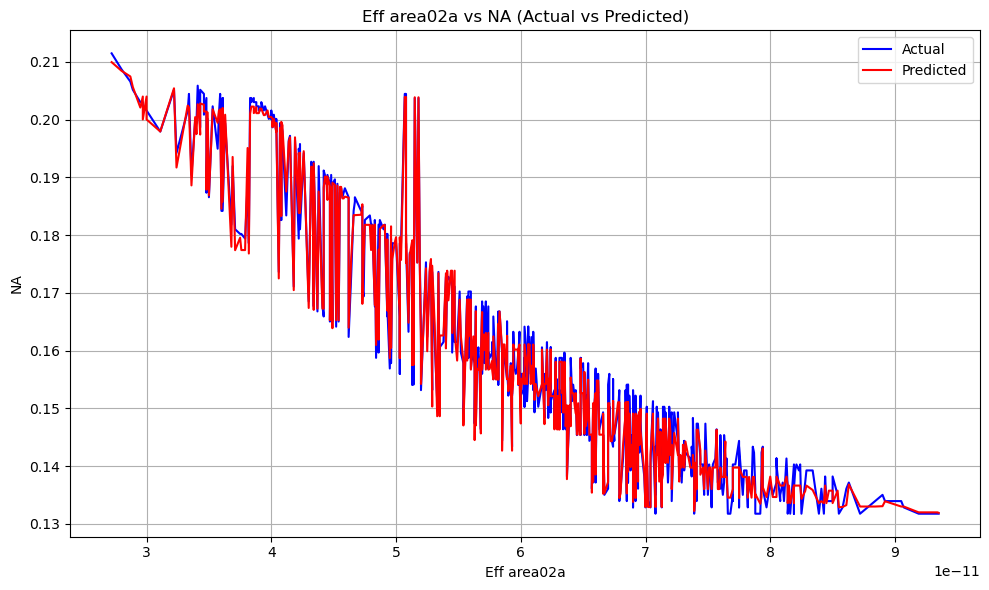

In [6]:
# Choose an output parameter to plot against
output_param = 'NA'

# Get the index of the selected output parameter
output_index = y.columns.get_loc(output_param)

# Extract the input feature values for plotting
input_feature = 'Eff area02a'  # Choose an input feature to plot against
input_index = X.columns.get_loc(input_feature)
input_values = X_test.iloc[:, input_index]

# Sort input values for smooth plotting
sorted_indices = np.argsort(input_values)
sorted_input_values = input_values.iloc[sorted_indices]
sorted_y_test_values = y_test.iloc[sorted_indices, output_index]
sorted_y_pred_values = y_pred[:, output_index][sorted_indices]

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot area plot for the actual and predicted values
ax.plot(sorted_input_values, sorted_y_test_values, color='blue', label='Actual')
ax.plot(sorted_input_values, sorted_y_pred_values, color='red', label='Predicted')
ax.fill_between(sorted_input_values, sorted_y_test_values, sorted_y_pred_values, color='none', alpha=0)
ax.set_xlabel(input_feature)
ax.set_ylabel(output_param)
ax.set_title(f'{input_feature} vs {output_param} (Actual vs Predicted)')
ax.legend()
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()


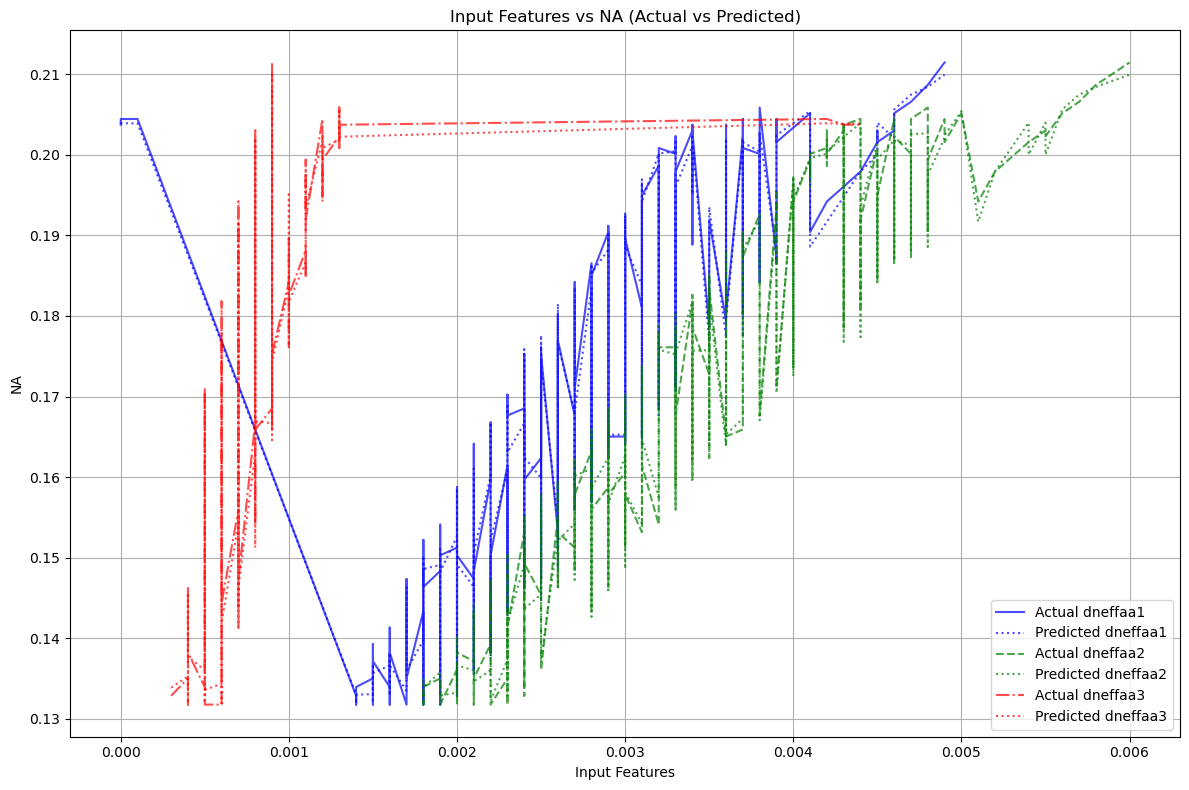

In [7]:
# Define a list of input features you want to plot against
input_features = ['dneffaa1','dneffaa2','dneffaa3']

# Define the output parameter to plot against
output_param = 'NA'
# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Define line styles and colors
line_styles = ['-', '--', '-.', ':']  # Example line styles
colors = ['blue', 'green', 'red', 'orange']  # Example colors

# Iterate over input features and plot each one against the output parameter
for i, input_feature in enumerate(input_features):
    input_index = X.columns.get_loc(input_feature)
    input_values = X_test.iloc[:, input_index]
    
    # Sort input values for smooth plotting
    sorted_indices = np.argsort(input_values)
    sorted_input_values = input_values.iloc[sorted_indices]
    sorted_y_test_values = y_test.iloc[sorted_indices, output_index]
    sorted_y_pred_values = y_pred[:, output_index][sorted_indices]
    
    # Plot actual values of the current input feature
    ax.plot(sorted_input_values, sorted_y_test_values, color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], alpha=0.7, label=f'Actual {input_feature}')
    
    # Plot predicted values of the current input feature
    ax.plot(sorted_input_values, sorted_y_pred_values, color=colors[i % len(colors)], linestyle=':', alpha=0.7, label=f'Predicted {input_feature}')
    ax.fill_between(sorted_input_values, sorted_y_test_values, sorted_y_pred_values, color='none')

# Set labels, title, legend, and grid
ax.set_xlabel('Input Features')
ax.set_ylabel(output_param)
ax.set_title(f'Input Features vs {output_param} (Actual vs Predicted)')
ax.legend()
ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


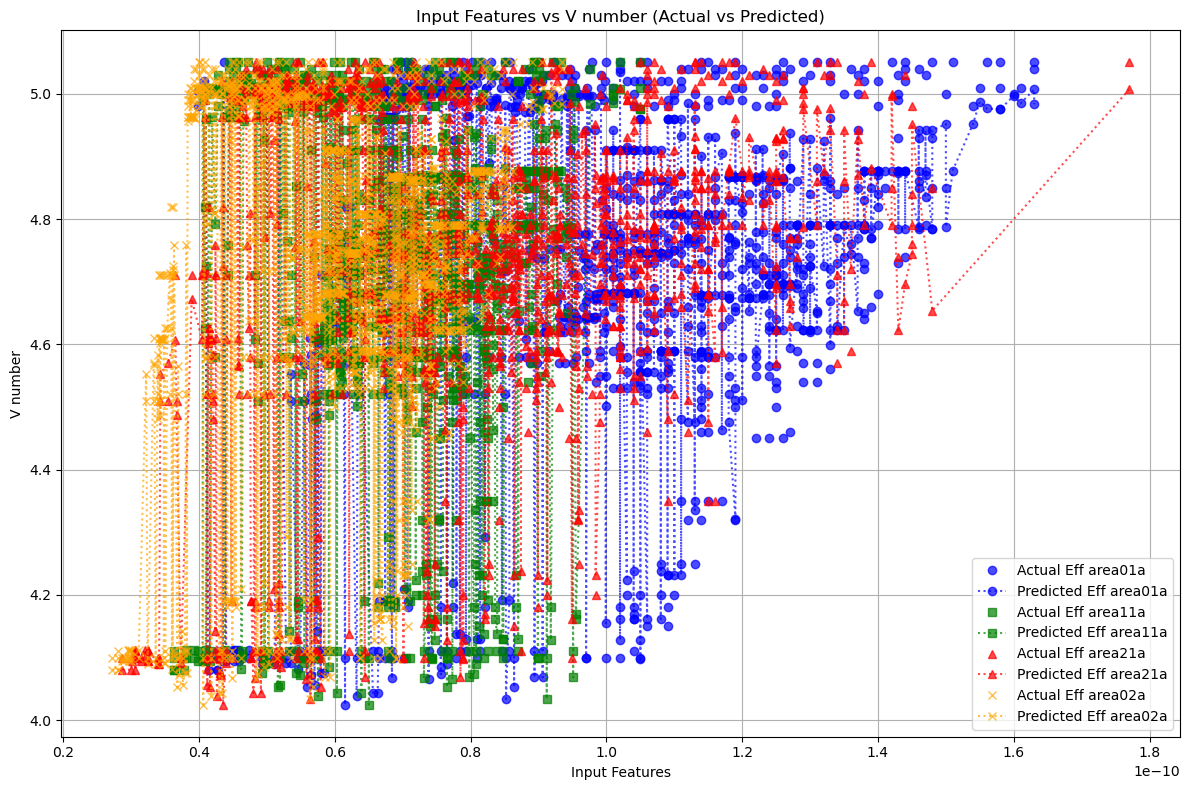

In [26]:
# Define a list of input features you want to plot against
input_features = ['Eff area01a', 'Eff area11a', 'Eff area21a', 'Eff area02a']

# Define the output parameter to plot against
output_param = 'V number'
# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Define markers, line styles, and colors
markers = ['o', 's', '^', 'x']  # Example markers
colors = ['blue', 'green', 'red', 'orange']  # Example colors

# Iterate over input features and plot each one against the output parameter
for i, input_feature in enumerate(input_features):
    input_index = X.columns.get_loc(input_feature)
    input_values = X_test.iloc[:, input_index]
    
    # Sort input values for smooth plotting
    sorted_indices = np.argsort(input_values)
    sorted_input_values = input_values.iloc[sorted_indices]
    sorted_y_test_values = y_test.iloc[sorted_indices, output_index]
    sorted_y_pred_values = y_pred[:, output_index][sorted_indices]
    
    # Plot actual values of the current input feature
    ax.plot(sorted_input_values, sorted_y_test_values, marker=markers[i % len(markers)], color=colors[i % len(colors)], linestyle='', alpha=0.7, label=f'Actual {input_feature}')
    
    # Plot predicted values of the current input feature
    ax.plot(sorted_input_values, sorted_y_pred_values, marker=markers[i % len(markers)], color=colors[i % len(colors)], linestyle=':', alpha=0.7, label=f'Predicted {input_feature}')
    ax.fill_between(sorted_input_values, sorted_y_test_values, sorted_y_pred_values, color='none')

# Set labels, title, legend, and grid
ax.set_xlabel('Input Features')
ax.set_ylabel(output_param)
ax.set_title(f'Input Features vs {output_param} (Actual vs Predicted)')
ax.legend()
ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
